## INGENIAS - Grupo 6. Aprendizaje no Supervisado - Modelos de Kmeans y Principal Component Analysis (PCA)

## Carga de datos

In [1]:
#Importamos librerías con las que se van a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings
# Ignorar todos los warnings
warnings.filterwarnings('ignore')
# Ignorar un warning específico por categoría
warnings.filterwarnings('ignore', category=DeprecationWarning)

###  Aprendizaje No Supervisado

### 1) Traemos la base limpia 
Tomamos la Base de Datos de KAGGLE y su objeto versa sobre VINOS

La base limpia surge de https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/ 

NOTA: Tiene la información de Tipo de Vinos eliminada

In [5]:
wine = pd.read_csv(r'C:\Users\USUARIO\Documents\PROYECTO INGENIAS YPF\PROYECTO\wine-clustering.csv')


In [6]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
#Observamos el nombre de las variables
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
#Corroboramos la inexistencia de datos nulos
wine.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### Realizamos un Análisis No Supervisado 
Seleccionamos variables para el modelo: en este caso elegimos "Alcohol" y "Fenoles" para observar si existe un agrupamiento en base al contenido porcentual de alcohol y la cantidad total de antioxidantes que tiene el vino.

In [9]:
#Consideramos sólo dos variables: "Alcohol" y "Fenoles"
X= wine.iloc[:, [0,5]].values

In [10]:
X

array([[14.23,  2.8 ],
       [13.2 ,  2.65],
       [13.16,  2.8 ],
       [14.37,  3.85],
       [13.24,  2.8 ],
       [14.2 ,  3.27],
       [14.39,  2.5 ],
       [14.06,  2.6 ],
       [14.83,  2.8 ],
       [13.86,  2.98],
       [14.1 ,  2.95],
       [14.12,  2.2 ],
       [13.75,  2.6 ],
       [14.75,  3.1 ],
       [14.38,  3.3 ],
       [13.63,  2.85],
       [14.3 ,  2.8 ],
       [13.83,  2.95],
       [14.19,  3.3 ],
       [13.64,  2.7 ],
       [14.06,  3.  ],
       [12.93,  2.41],
       [13.71,  2.61],
       [12.85,  2.48],
       [13.5 ,  2.53],
       [13.05,  2.63],
       [13.39,  2.85],
       [13.3 ,  2.4 ],
       [13.87,  2.95],
       [14.02,  2.65],
       [13.73,  3.  ],
       [13.58,  2.86],
       [13.68,  2.42],
       [13.76,  2.95],
       [13.51,  2.35],
       [13.48,  2.7 ],
       [13.28,  2.6 ],
       [13.05,  2.45],
       [13.07,  2.4 ],
       [14.22,  3.  ],
       [13.56,  3.15],
       [13.41,  2.45],
       [13.88,  3.25],
       [13.

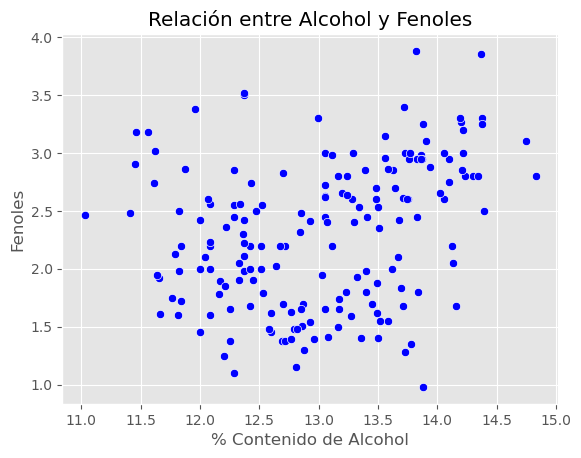

In [11]:
#Miramos cómo se relacionan las mencionadas variables
sns.scatterplot(x = X[:, 0], y = X[:, 1],  c='blue')
plt.title('Relación entre Alcohol y Fenoles')
plt.xlabel('% Contenido de Alcohol')
plt.ylabel('Fenoles')
plt.show()

Utilizaremos "El método del codo", a fin de graficar la variación total explicada (inercia) por el modelo en función del número de clústers, y luego seleccionar el número de clústers donde la disminución en la variación comienza a reducirse bruscamente.

In [12]:
K = np.arange(1, 10)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

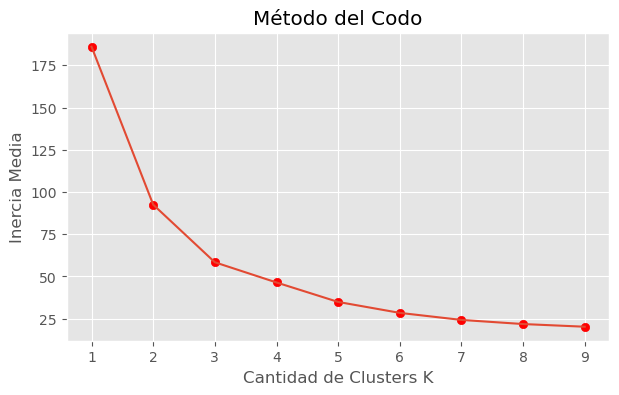

In [13]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia Media')
plt.title('Método del Codo')
plt.show()

En este gráfico observamos que el número de clústers donde la disminución en la variación cae abruptamente, es decir, donde se grafica el "codo", es en 3 clústers.

In [14]:
kmeansmodel = KMeans(n_clusters= 3, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [15]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1, 2])

In [16]:
centros = kmeansmodel.cluster_centers_
print(centros)

[[13.17914894  1.6112766 ]
 [12.15373134  2.24910448]
 [13.75609375  2.84546875]]


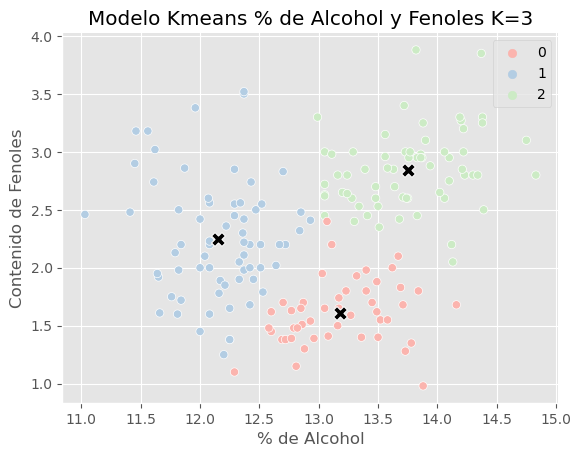

In [17]:
# Graficamos los datos y centroides en 2D
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=etiquetas_kmeans, palette='Pastel1')
sns.scatterplot(x = centros[:, 0], y = centros[:, 1], color='black', marker="X", s=100)
plt.title('Modelo Kmeans % de Alcohol y Fenoles K=3')
plt.xlabel('% de Alcohol')
plt.ylabel('Contenido de Fenoles')
sns.despine()
plt.show()

En base a este análisis no supervisado se observa que los vinos pueden agruparse en 3 grupos en base al grado de alcohol y al contenido total de fenoles (antioxidantes). 
Clúster 1 (Rosa): De bajo porcentaje de Alcohol y bajo contenido de Fenoles.
Clúster 2 (Celeste): De alto porcentaje de Alcohol y alto contenido de Fenoles.
Cluster 3 (Verde): De bajo porcentaje de Alcohol y contenido de Fenoles con una gran dispersión.

Una vez establecidos los clústers, podremos observar la cantidad de puntos asignados a cada cluster.

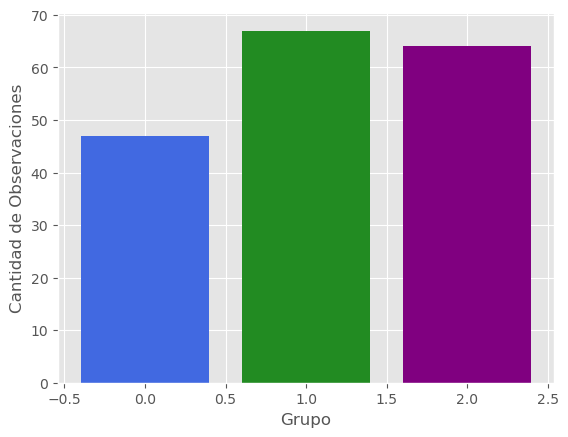

In [18]:
cluster_counts = np.bincount(y_kmeans)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'forestgreen', 'purple']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show() 

#### Evaluación con Suma de los Cuadrados de las Distancias (SSD)

In [19]:
# Calculamos la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  58.39831216953795


Esta métrica mide la distancia entre cada punto y su centroide asignado, y luego suma los cuadrados de estas distancias. La SSD es una medida de cuán bien los centroides representan los puntos en el dataset, y se espera que disminuya a medida que se ajusta el modelo.
- Una SSD baja indica que los puntos dentro de un mismo clúster son muy similares entre sí, lo que sugiere que los clústers son coherentes y bien definidos.

El resultado obtenido nos sugiere que los clusters obtenidos por el algoritmo K-means son relativamente coherentes y bien definidos.

#### Evaluación con Silhoutte

In [20]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.43919614923122996


Si el Coeficiente de Silhouette es cercano a 0, significa que los puntos están cerca del límite entre dos clústers, y que no está claro a qué clúster deberían pertenecer. Si es cercano a 1 quiere decir que los clústers están bien definidos.

Vemos que nos da un coeficiente de 0.43, por lo que esto nos indicaría que tenemos una buena separación entre los clústers.

In [21]:
K = np.arange(2,20)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(X)
  lista_silueta.append(silhouette_score(X, kmeans_silueta.labels_))

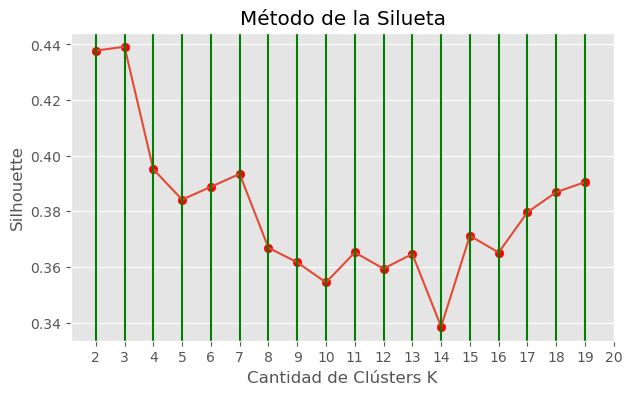

In [22]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clústers K')
plt.ylabel('Silhouette')
plt.title('Método de la Silueta')
plt.xticks(np.arange(2,21))
for x in np.arange(2,20):
  plt.axvline(x,0,1,color='green')
plt.show()

## Clusterización en base a todas las características del vino.
Ahora bien, nos interesa generar clusters en base a todas las dimensiones del vino que contiene el dataset.

Dado que vamos a utilizar toda la información y dado que no queremos sesgar los resultados, identificamos el valor promedio y la dispersión de las variables.

In [23]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
wine.mean(axis=0)

----------------------
Media de cada variable
----------------------


Alcohol                  13.000618
Malic_Acid                2.336348
Ash                       2.366517
Ash_Alcanity             19.494944
Magnesium                99.741573
Total_Phenols             2.295112
Flavanoids                2.029270
Nonflavanoid_Phenols      0.361854
Proanthocyanins           1.590899
Color_Intensity           5.058090
Hue                       0.957449
OD280                     2.611685
Proline                 746.893258
dtype: float64

La media de las variables muestra que hay medias que son muy elevados con respecto al resto, como por ejemplo en los componentes "Proline" y "Magnesium".

In [24]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
wine.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

La varianza es muy distinta entre las variables, en los casos de Proline y Magnesio, la varianza es varios órdenes de magnitud superior al resto.

In [25]:
scaler = StandardScaler()
scaler.fit(wine)
wine_scaled = scaler.transform(wine)

In [26]:
wine_scaled = pd.DataFrame(data = wine_scaled, columns = wine.columns)

In [27]:
wine_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [28]:
W=wine_scaled.values

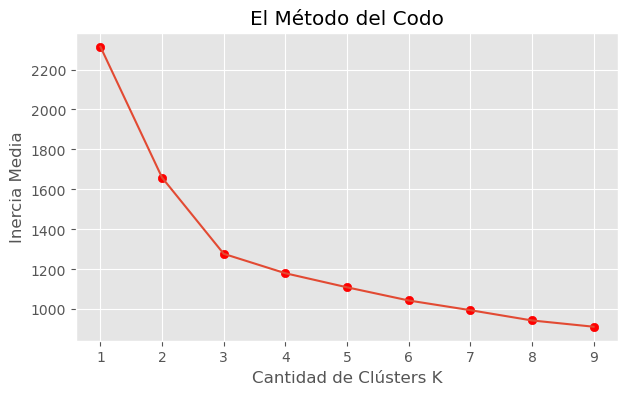

In [29]:
K = np.arange(1, 10)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(W)
  lista_inercias.append(kmeans.inertia_)
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clústers K')
plt.ylabel('Inercia Media')
plt.title('El Método del Codo')
plt.show()

Como surge de la gráfica, el punto donde se dibuja el codo, es en k=3. Se puede decir, entonces, que es el número correcto de clústers para agrupar todas las variables del dataset.

In [30]:
kmeansmodel_W = KMeans(n_clusters= 3, random_state=0)
y_kmeans_W= kmeansmodel_W.fit_predict(W)

In [31]:
centros_W = kmeansmodel_W.cluster_centers_
print(centros_W)

[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]


In [32]:
etiquetas_kmeans_W = kmeansmodel_W.labels_
np.unique(etiquetas_kmeans_W)

array([0, 1, 2])

In [33]:
etiquetas_kmeans_W

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
#Transformamos las etiquetas a un dataframe y después mergeamos
cluster_df = pd.DataFrame(etiquetas_kmeans_W, columns=['cluster'])
df_merged = pd.merge(wine_scaled, cluster_df, right_index=True, left_index=True)

In [35]:
df_merged.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,2


A continuación observamos cómo clasifica en clústers considerando todas las variables, las dos dimensiones que realizamos por separado.

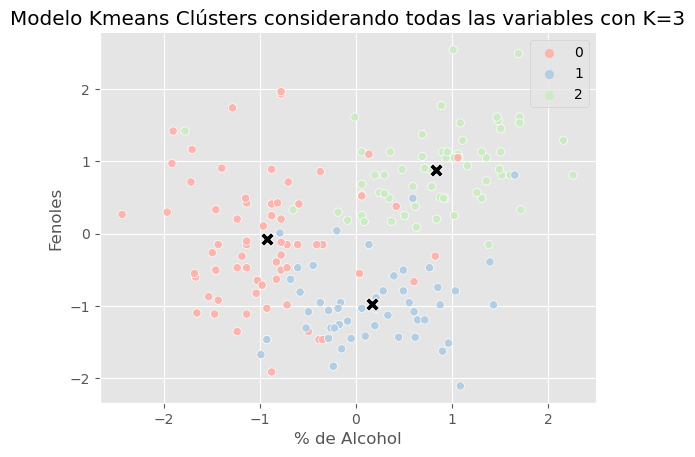

In [36]:
sns.scatterplot(x = W[:, 0], y = W[:, 5], hue=etiquetas_kmeans_W, palette='Pastel1')
sns.scatterplot(x = centros_W[:, 0], y = centros_W[:, 5], color='black', marker="X", s=100)
plt.title('Modelo Kmeans Clústers considerando todas las variables con K=3')
plt.xlabel('% de Alcohol')
plt.ylabel('Fenoles')
sns.despine()
plt.show()

#### Evaluación con Suma de los Cuadrados de las Distancias (SSD)

In [37]:
# Calculamos la SSD
SSD_W = kmeansmodel_W.inertia_
print("SSD: ", SSD_W)

SSD:  1277.928488844642


Éste resultado y comparando con el SSD obtenido en las dos dimensiones, sugiere que los clústers obtenidos por el algoritmo K-means se encuentran levemente bien definidos.

#### Evaluación con Silhoutte

In [38]:
silhouette_coef_W = silhouette_score(W, etiquetas_kmeans_W)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef_W)

Coeficiente de Silueta para KMeans:  0.2848589191898987


Si el Coeficiente de Silhouette es cercano a 0, significa que los puntos están cerca del límite entre dos clústers, y que no está claro a qué cluster deberían pertenecer, mientras que si es cercano a 1 quiere decir que los clústers están bien definidos.

Vemos que nos da un coeficiente de 0.28, por lo que esto nos indicaría que tenemos una separación entre los clusters, que no es del todo buena.

In [39]:
K = np.arange(2,20)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(W)
  lista_silueta.append(silhouette_score(W, kmeans_silueta.labels_))

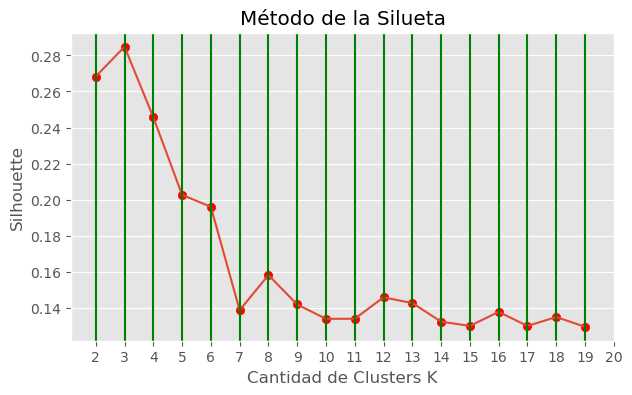

In [40]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette')
plt.title('Método de la Silueta')
plt.xticks(np.arange(2,21))
for x in np.arange(2,20):
  plt.axvline(x,0,1,color='green')
plt.show()

## Modelo de PCA

En base al análisis realizado, para el calculo del PCA requerimos estandarizar las variables para que tengan media "0" y desviación estándar de "1", sino la variable "Proline", que tiene una media y dispersión muy superior al resto, dominará la mayoría de las variables principales.

In [41]:
pca = PCA(n_components=2)  #Reducimos la dimensionalidad a 2 componentes principales
X_pca = pca.fit_transform(W)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2']) #Pasamos los PCA a un dataframe
df_merged = pd.merge(wine_scaled, pca_df, right_index=True, left_index=True) #las une con la base de datos rescalada

In [42]:
df_merged.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,PC1,PC2
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,3.316751,-1.443463
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2.209465,0.333393
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2.516740,-1.031151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,3.757066,-2.756372
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.008908,-0.869831


In [43]:
cumVar = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(pca.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2"})

,VarPerc,cumVarPerc
PC1,36.198848,36.198848
PC2,19.207490,55.406338


En este caso, la primer componente explica el 36% de la varianza observada en los datos y la segunda el 19,2%. Acumulan el 55,4% de la explicación de la varianza.

In [44]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color="#c7e9c0", edgecolor="#006d2c", alpha=0.5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='#253494',alpha=0.5,lw=2)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color="#000000", ha="center", va="center")
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color="#000000", ha="center", va="center")
    plt.xlim(-.75,1)
    plt.ylim(-0.5,1)
    plt.grid(False)
    plt.xticks(np.arange(0, 1, 0.5), size=12)
    plt.yticks(np.arange(-0.75, 1, 0.5), size=12)
    plt.xlabel("Component 1", size=14)
    plt.ylabel("Component 2", size=14)
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);

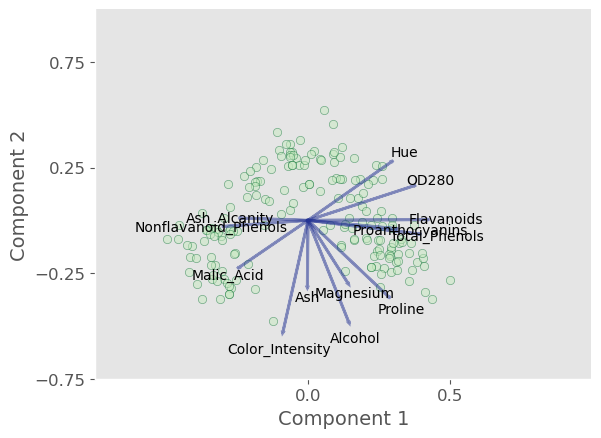

In [45]:
array_pca = np.array(pca_df)
biplot(array_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=wine_scaled.columns)

Para un análisis del gráfico, para los vectores (variables), nos fijamos en su longitud y en el ángulo con respecto a los ejes de las componentes principales y entre ellos mismos:

Ángulo: cuanto más paralelo es un vector al eje de una componente, más ha contribuido a la creación de la misma. Con ello obtenemos información sobre qué variable o variables han sido más determinantes para crear cada componente, y si entre las variables (y cuáles) hay correlaciones. Ángulos pequeños entre vectores representan alta correlación entre las variables implicadas (observaciones con valores altos en una de esas variables tendrá valores altos en la variable o variables correlacionadas); ángulos rectos representan falta de correlación, y ángulos opuestos representan correlación negativa (una observación con valores altos en una de las variables irá acompañado de valores bajos en la otra). En este caso, el Componente 1 es explicado principalmente por Flavanoids, Proanthocyanins y total de Fenoles, que están altamente correlacionadas entre sí. Y por otro lado, también el Componente 1 es explicado por la alcalinidad y nonflavanoid phenols, que se encuentran fuertemente correlacionadas entre sí.
El Componente 2 es principalmente explicado por Ash, contenido % de alcohol e intensidad del color; estas 3 variables se ven fuertemente relacionadas entre sí.

Longitud: cuanto mayor es la longitud de un vector relacionado con x variable (en un rango normalizado de 0 a 1), mayor variabilidad de dicha variable está contenida en la representación de las dos componentes del biplot, es decir, mejor está representada su información en el gráfico.

Para los scores (observaciones), nos fijamos en los posibles agrupamientos: Puntuaciones próximas representan observaciones de similares características. Puntuaciones con valores de las variables próximas a la media se sitúan más cerca del centro del biplot (0, 0). El resto representan variabilidades normales o extremas (outliers). Por otro lado, la relación de las observaciones con las variables se puede estudiar proyectando las observaciones sobre la dirección de los vectores.

#### Porcentaje de Varianza Explicada Acumulada

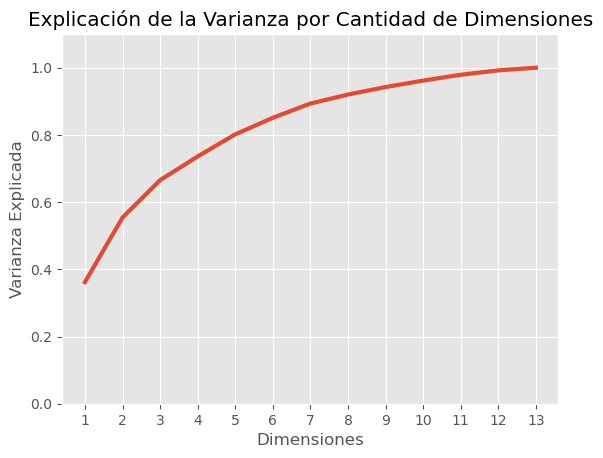

In [46]:
pca_test = PCA()
pca_test.fit(W)

cumsum = np.cumsum(pca_test.explained_variance_ratio_)
dim = np.arange(len(cumsum)) + 1

plt.plot(dim, cumsum, '-', lw=3);

plt.xlabel('Dimensiones')
plt.ylabel('Varianza Explicada')
plt.title('Explicación de la Varianza por Cantidad de Dimensiones')

plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
plt.ylim([0, 1.1]);

Esta graficación nos ayuda a determinar cuántas dimensiones (componentes principales) necesitamos retener para mantener una cantidad significativa
de la varianza en nuestros datos.
Si la curva alcanza un valor cercano a 1, las dimensiones principales capturan la mayor parte de la información en nuestros datos. En este caso, entre la séptima y la novena dimensión alcanza un valor cercano a 1.